In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [14]:
audio_path = '../Data/MPB Audios/'
label_path = '../Data/MPB Labels/'
var_path = '../Data/Variables/'

audios = var_path + 'mpb_batch_1_audios.txt'
labels = var_path + 'mpb_batch_1_labels.txt'

color_ann = {'N': 'white', 
             'C': 'peru', 'C#': 'springgreen', 'D': 'coral', 
             'D#': 'olive', 'Dm': 'teal', 'Em': 'pink',
             'F': 'greenyellow', 'F#': 'purple','G': 'steelblue', 'G#':'indigo', 
             'Am':'orange', 'A#':'saddlwbrown', 'A#m':'lightcoral'}

song_selected = [0, 1, 2, 3, 4, 5]

In [15]:
audio_list = get_files(audios, audio_path)
label_list = get_files(labels, label_path)
name_list = get_name_list(audio_list)

song_dict = get_song_dict(name_list, audio_list, label_list)
song_dict


{0: ['Comeu',
  'r',
  '../Data/MPB Audios/Caetano Veloso - Comeu.wav',
  '../Data/MPB Labels/comeu.csv'],
 1: ['As Praias Desertas',
  'b',
  '../Data/MPB Audios/Tom Jobim - As Praias Desertas.wav',
  '../Data/MPB Labels/as_praias_desertas.csv'],
 2: ['Ate Segunda-Feira',
  'c',
  '../Data/MPB Audios/Chico Buarque - Ate Segunda-Feira.wav',
  '../Data/MPB Labels/ate_segunda_feira.csv'],
 3: ['Juca',
  'g',
  '../Data/MPB Audios/Chico Buarque - Juca.wav',
  '../Data/MPB Labels/juca.csv'],
 4: ['Atras Poeira',
  'm',
  '../Data/MPB Audios/Ivan Lins - Atras Poeira.wav',
  '../Data/MPB Labels/atras_poeira.csv'],
 5: ['Comecar De Novo',
  'y',
  '../Data/MPB Audios/Ivan Lins - Comecar De Novo.wav',
  '../Data/MPB Labels/comecar_de_novo.csv']}

In [16]:
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')

===== Computation of STFT-based chromagrams =====
Processing:  Comeu
Processing:  As Praias Desertas
Processing:  Ate Segunda-Feira
Processing:  Juca
Processing:  Atras Poeira
Processing:  Comecar De Novo
===== Computation of CQT-based chromagrams =====
Processing:  Comeu
Processing:  As Praias Desertas
Processing:  Ate Segunda-Feira
Processing:  Juca
Processing:  Atras Poeira
Processing:  Comecar De Novo
===== Computation of IIR-based chromagrams =====
Processing:  Comeu
Processing:  As Praias Desertas
Processing:  Ate Segunda-Feira
Processing:  Juca
Processing:  Atras Poeira
Processing:  Comecar De Novo


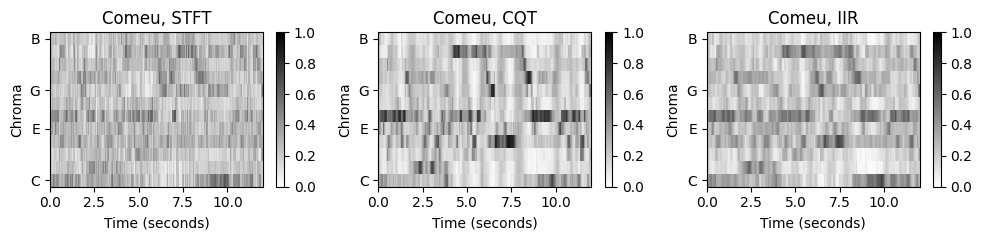

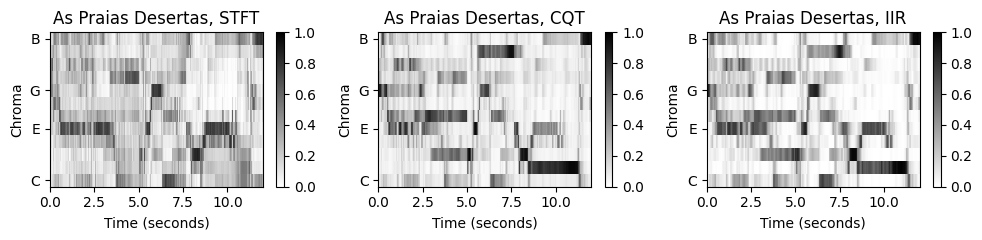

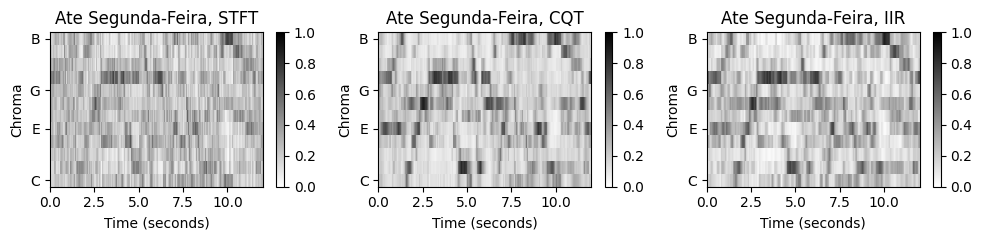

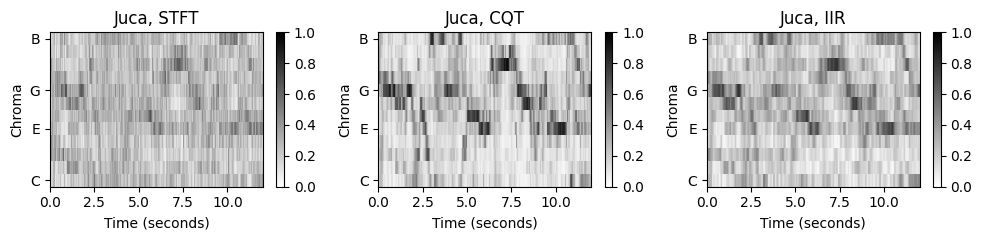

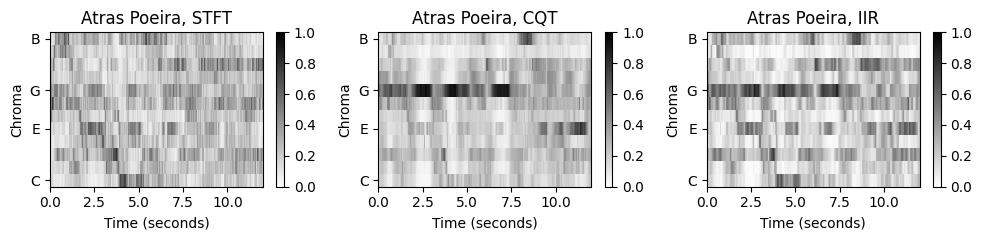

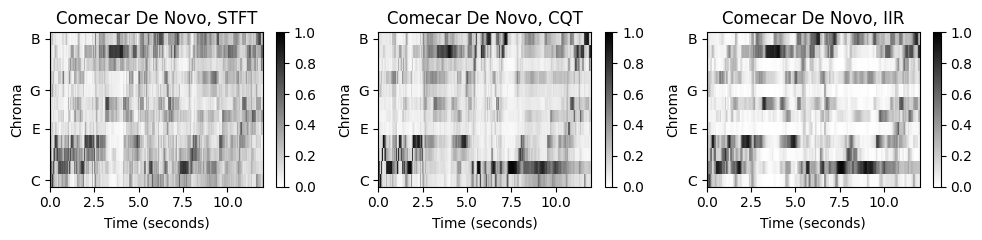

In [17]:
get_chromagrams(song_selected, song_dict, Fs_X_dict_STFT, X_dict_STFT, Fs_X_dict_CQT, X_dict_CQT, Fs_X_dict_IIR, X_dict_IIR)

In [18]:
tr_matrix = '../Data/Matrices/matriz_de_transicao.csv'
df = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


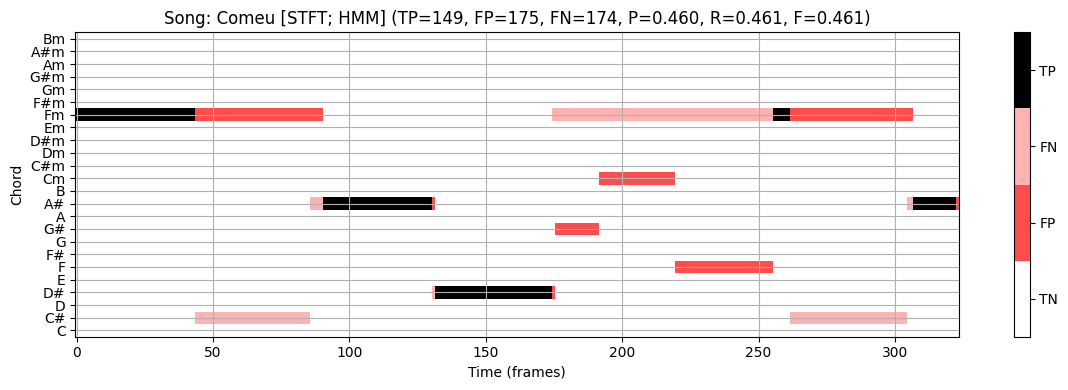

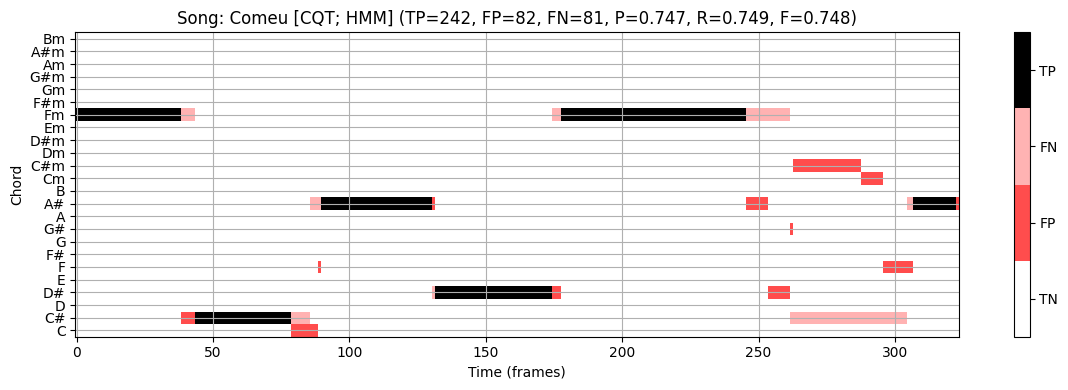

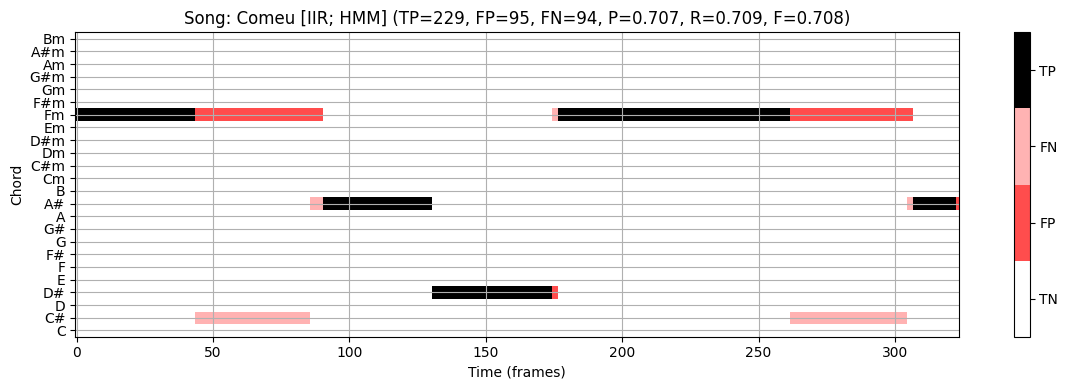

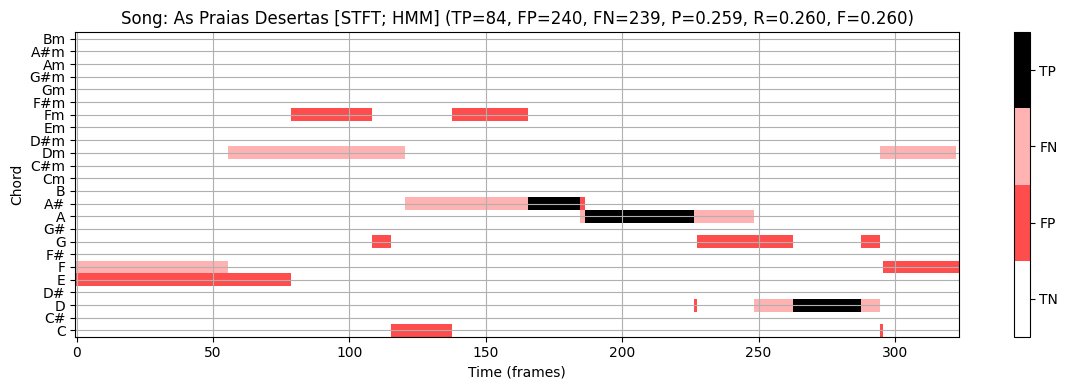

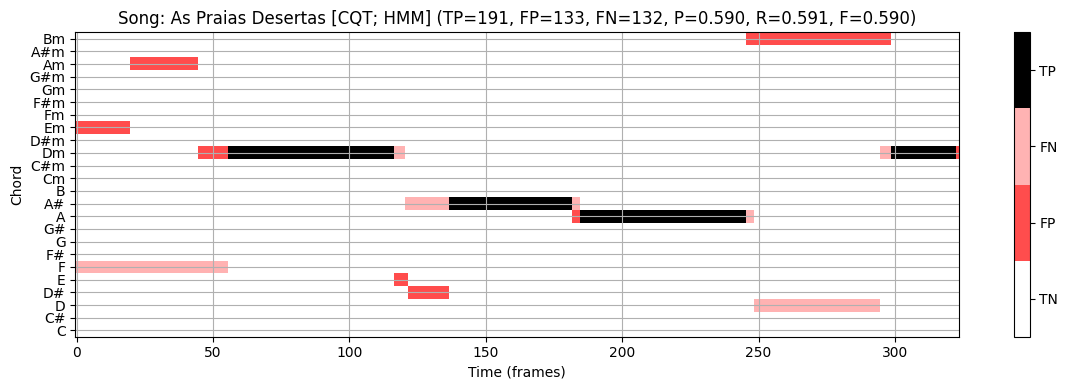

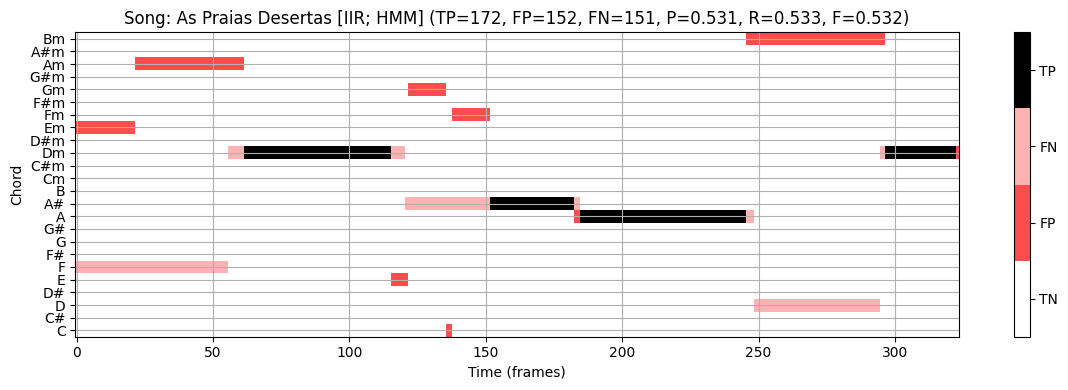

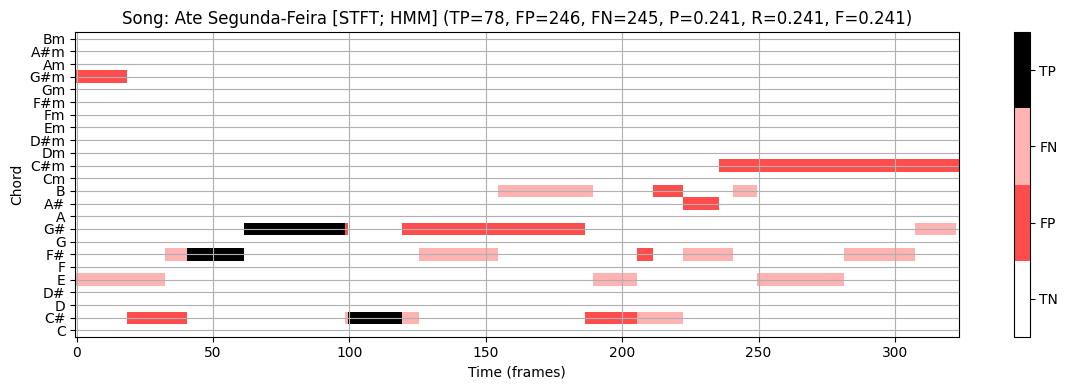

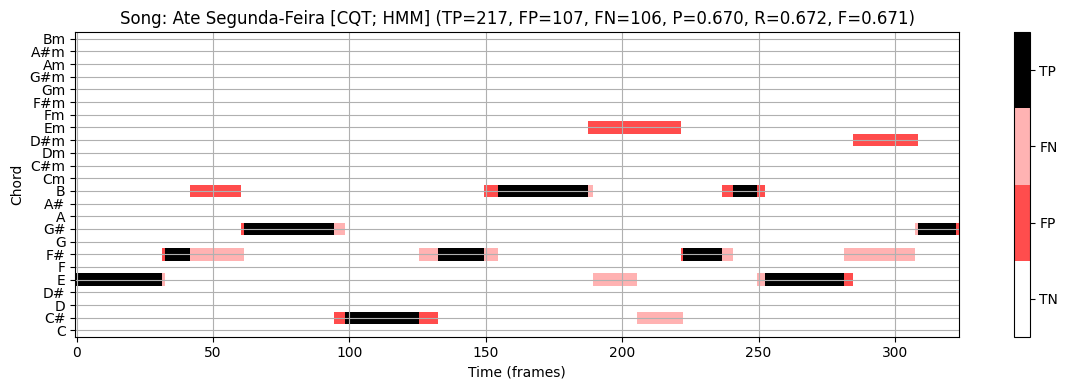

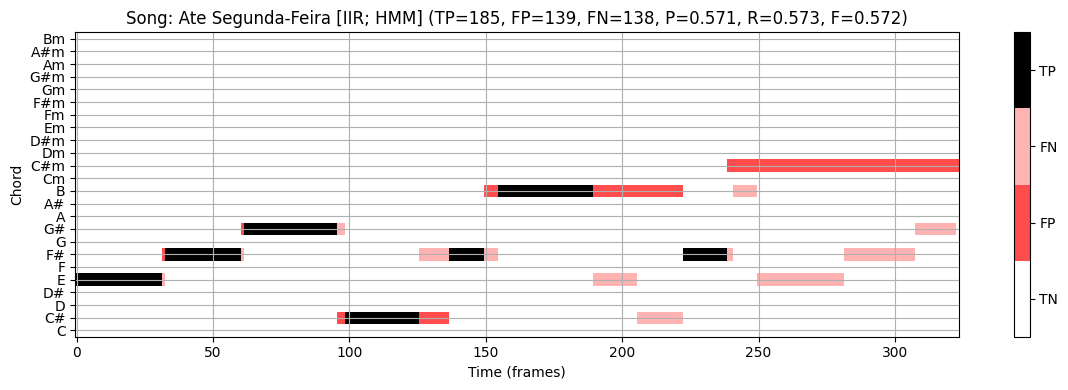

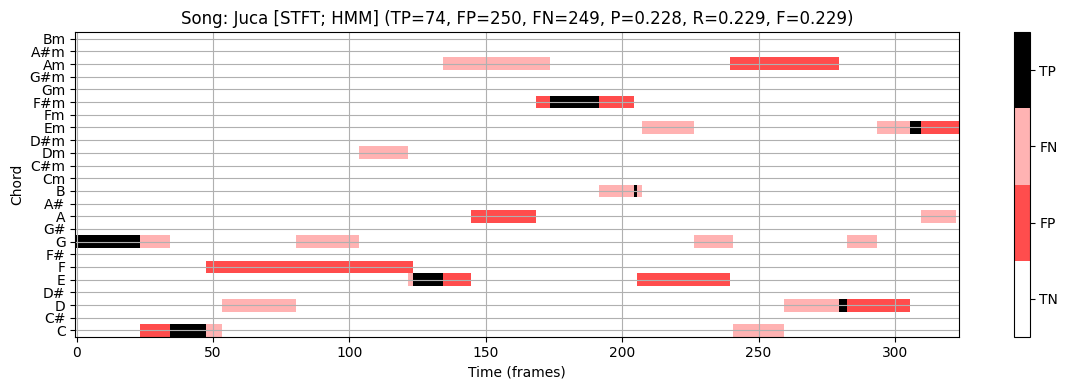

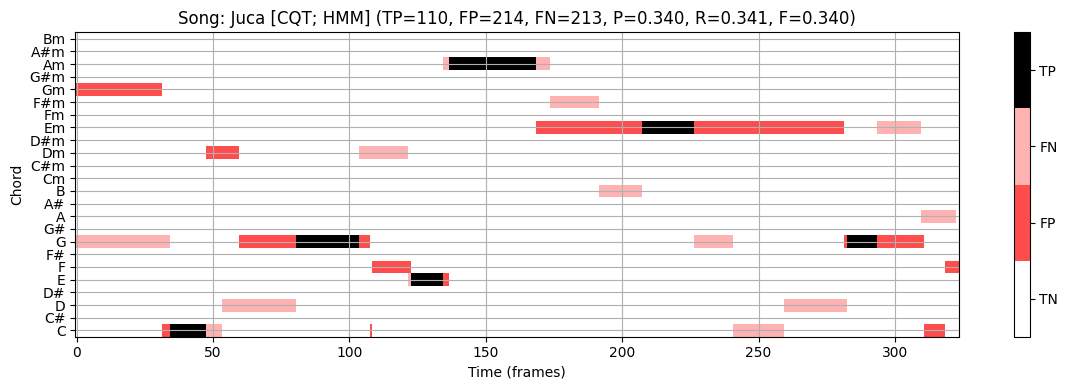

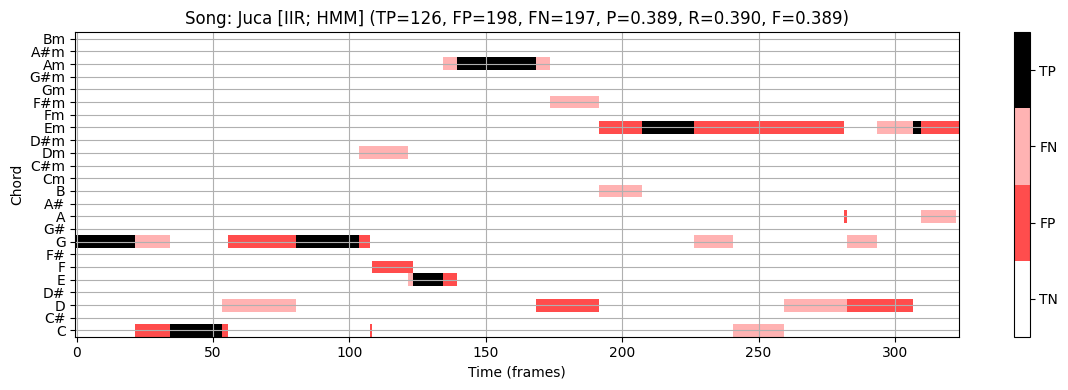

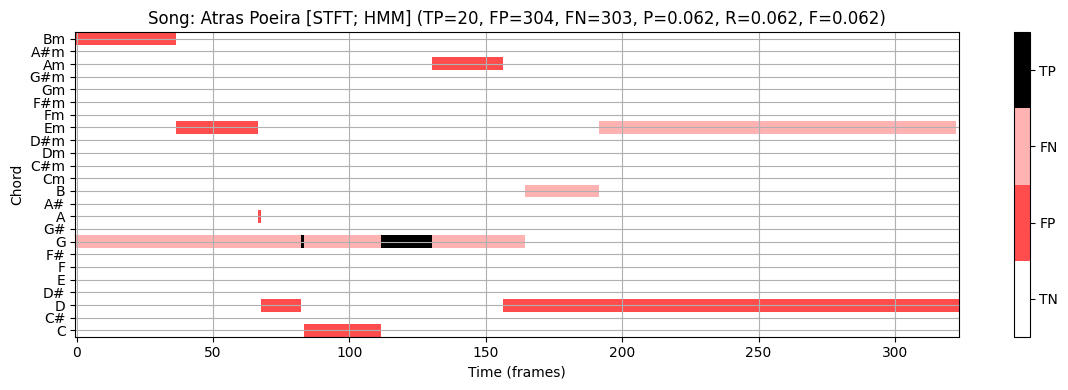

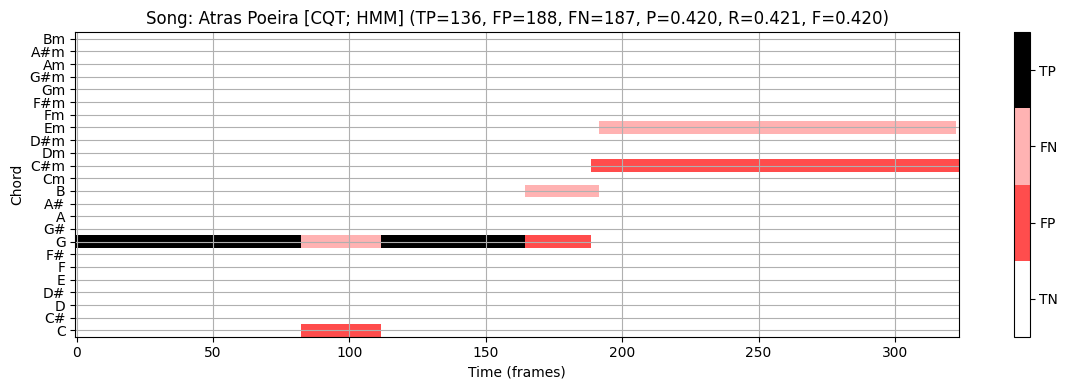

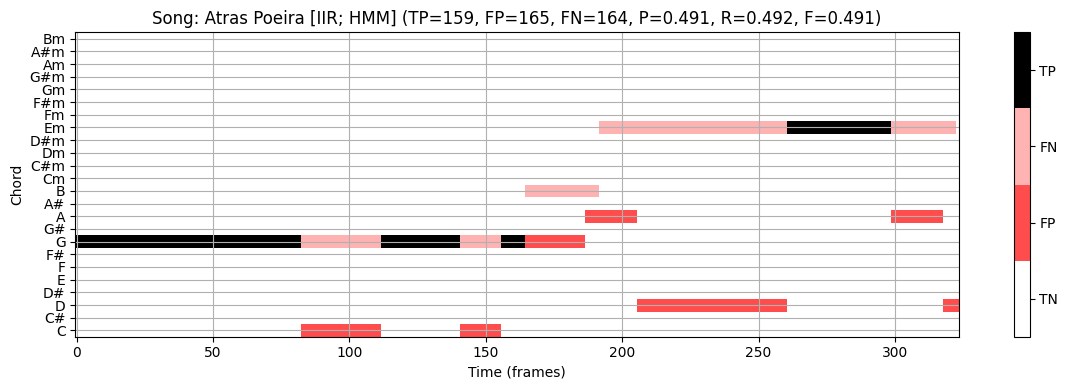

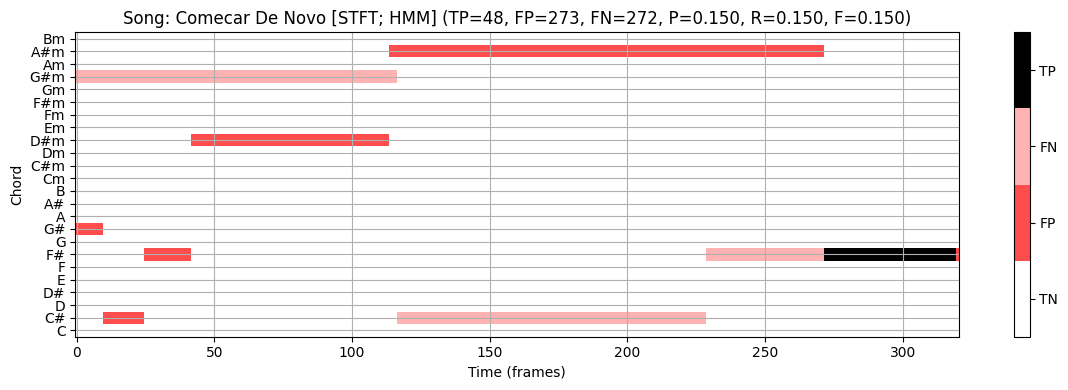

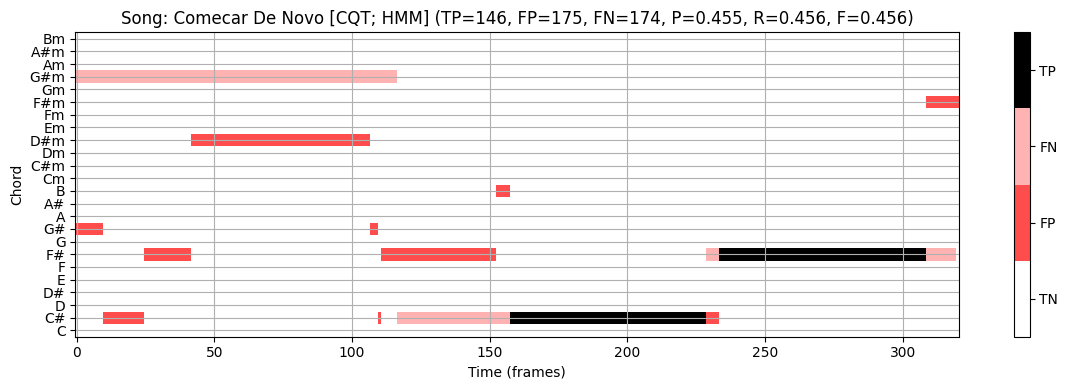

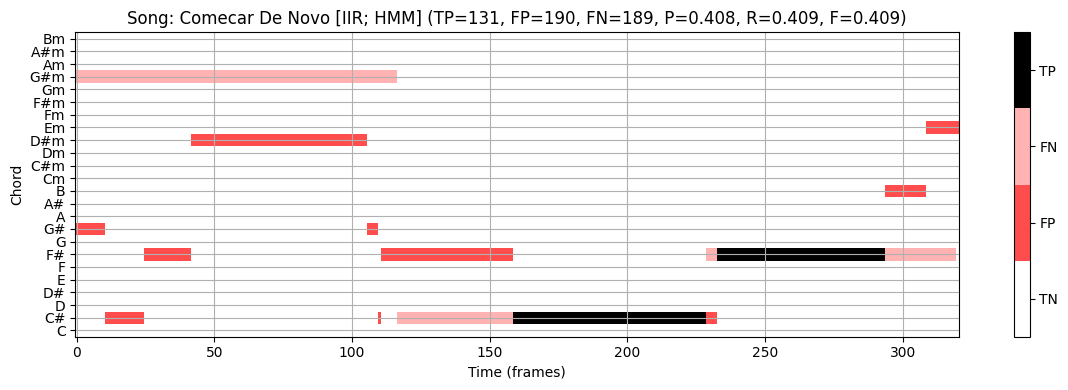

In [19]:
# Matriz mpb
p = 0.5
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], df, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


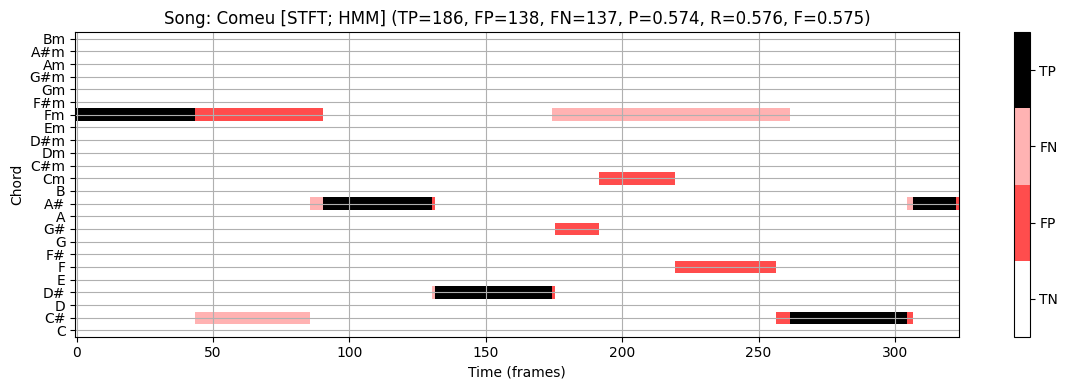

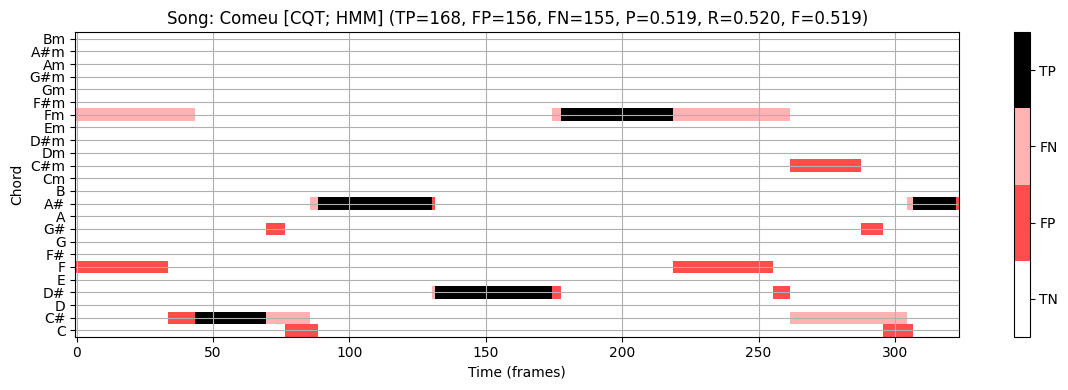

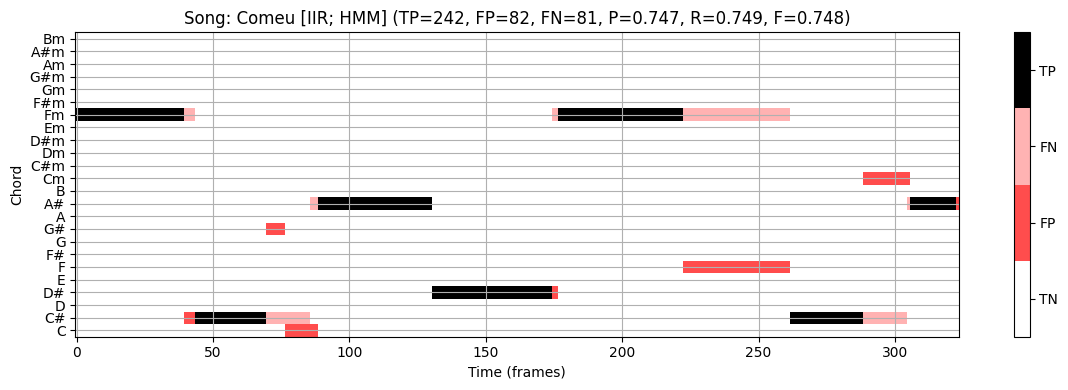

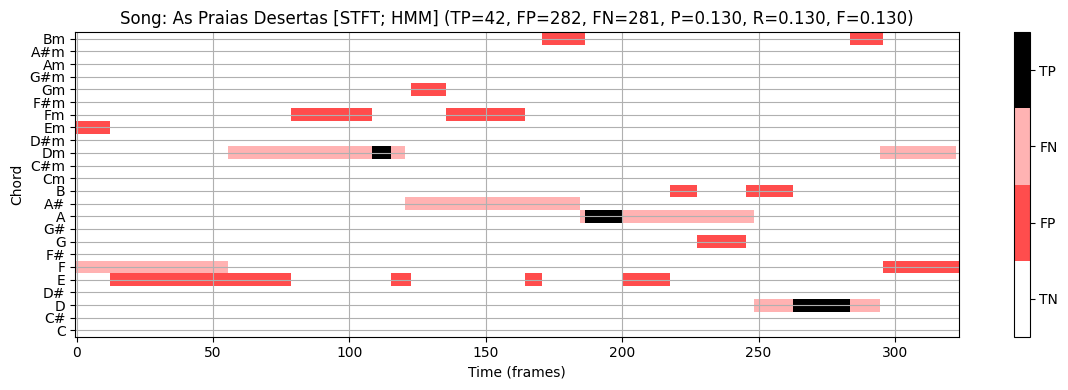

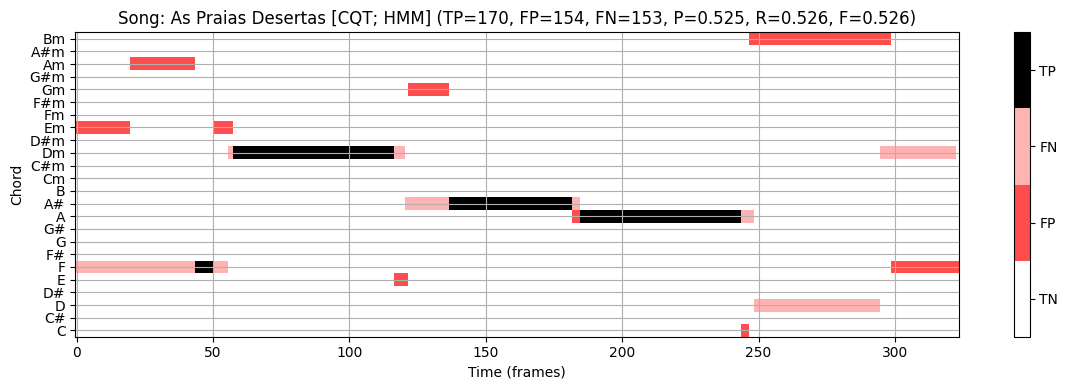

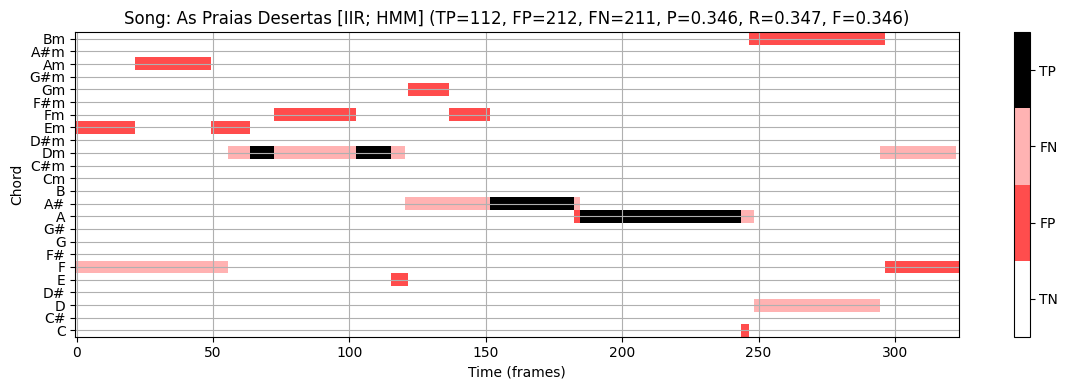

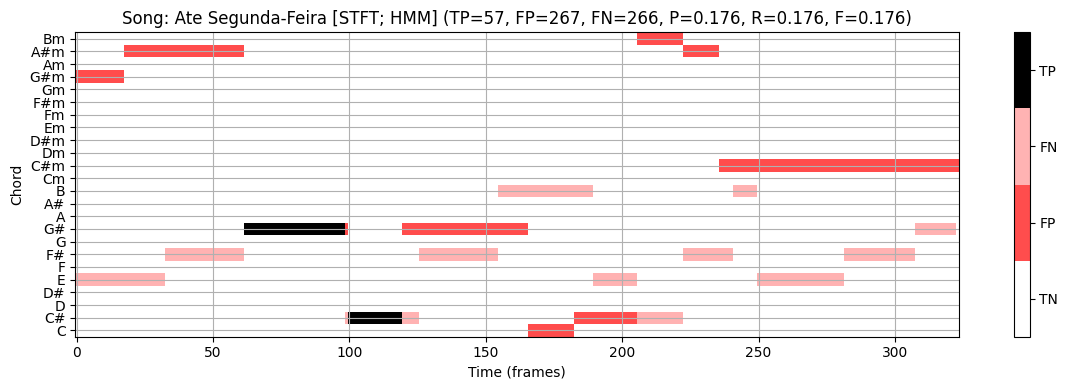

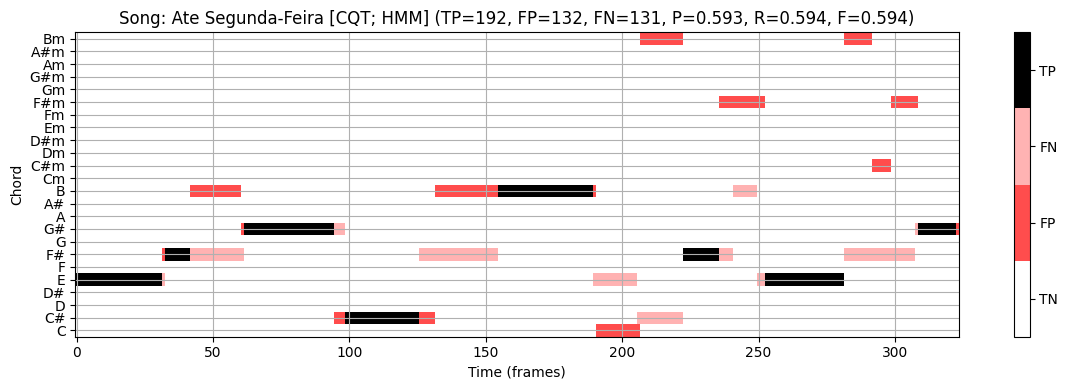

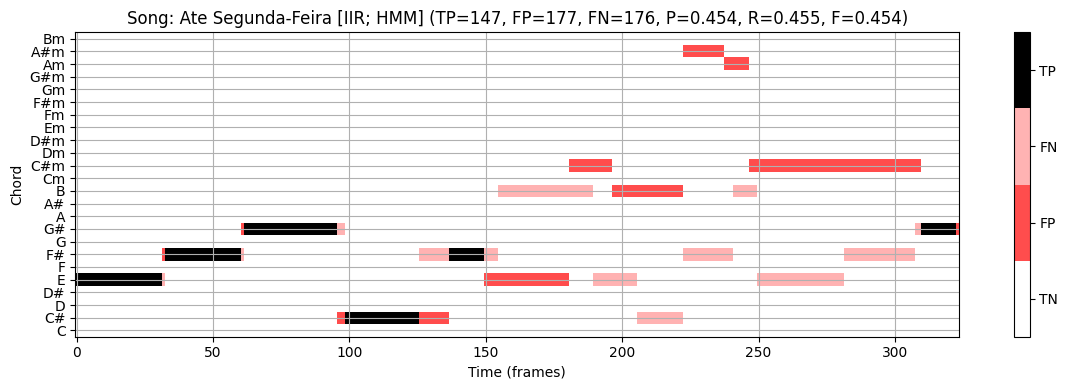

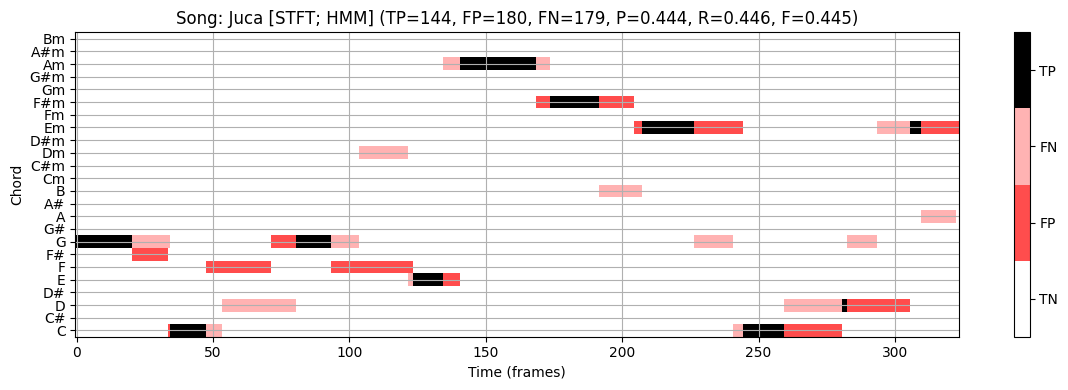

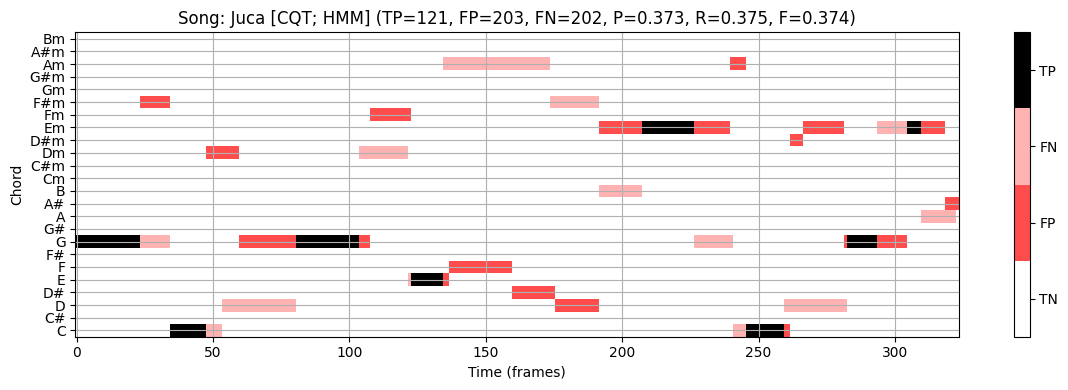

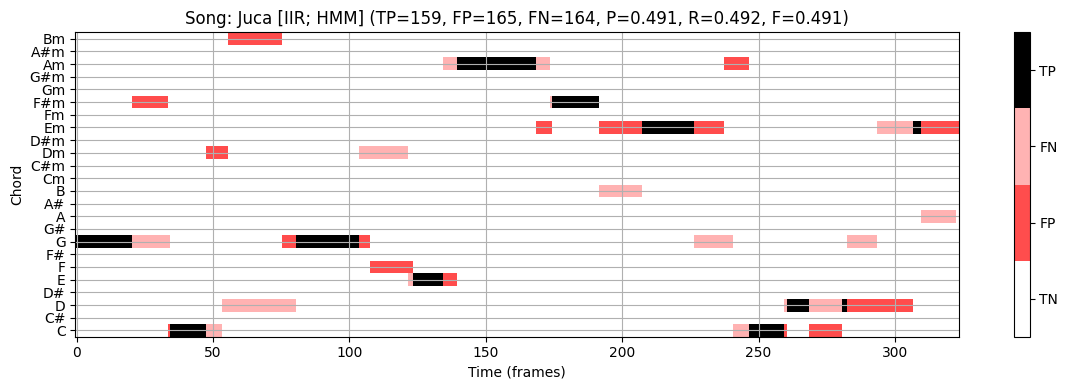

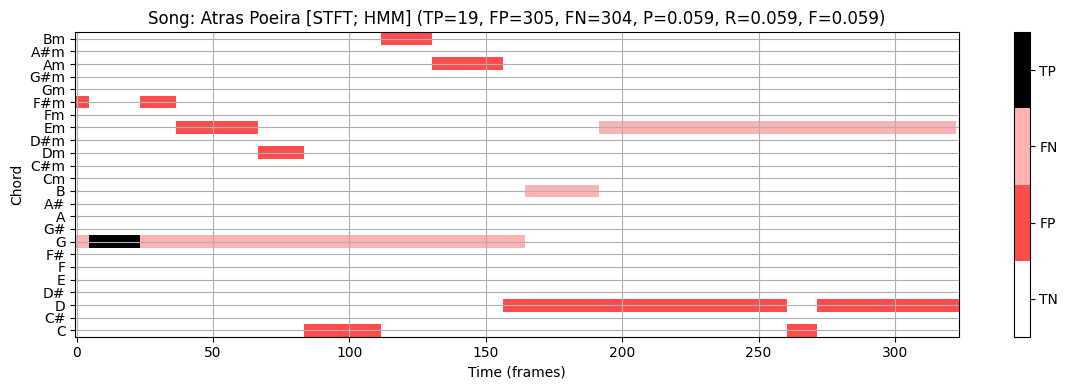

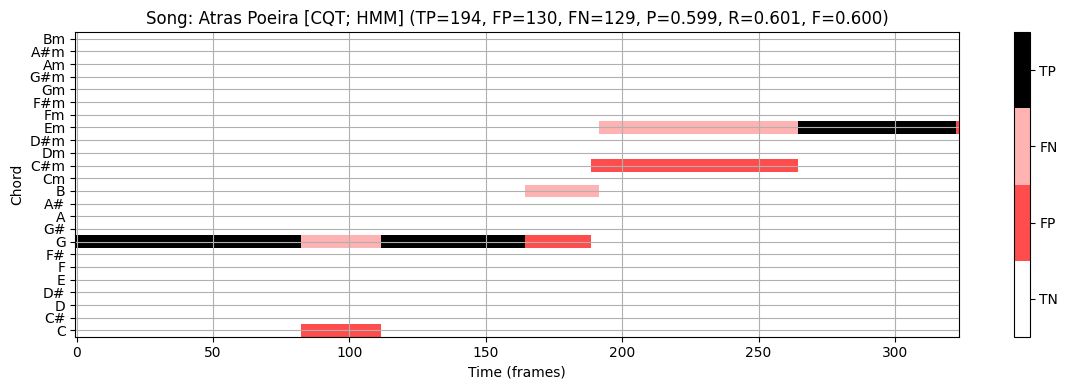

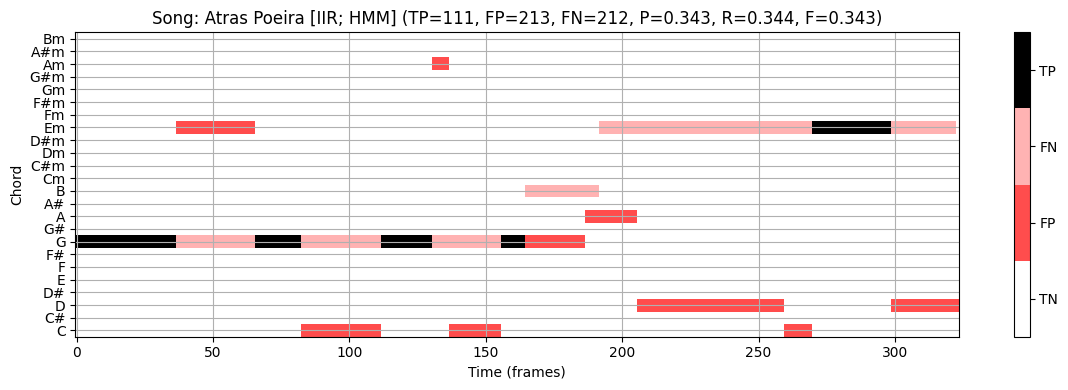

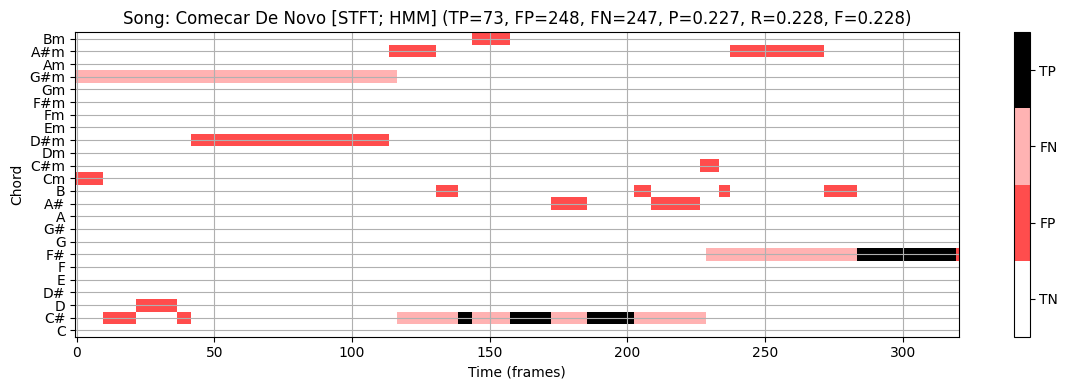

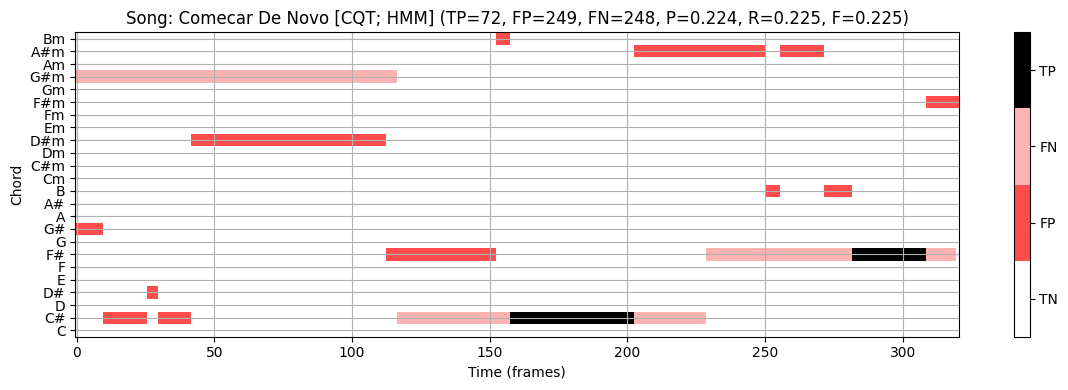

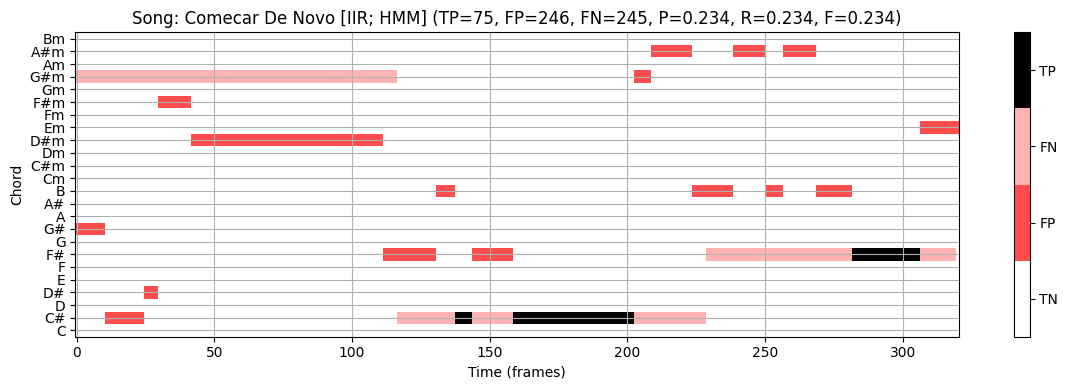

In [20]:
# Matriz Uniforme
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0])
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0])
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0])
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  